In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.datasets import load_files
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
hello = tf.constant('TensorFlow 2.0 Hello World')
tf.print(hello)

TensorFlow 2.0 Hello World


In [4]:
print(hello)

tf.Tensor(b'TensorFlow 2.0 Hello World', shape=(), dtype=string)


## 1. Data Wrangling, Data Storytelling, and EDA

In [5]:
# Reading in the train and test folders and label file
train_folder = 'C:/Users/Ariel/Desktop/01 DATA SCIENCE/Springboard/Capstone 2/dog-breed-identification/train'
test_folder = 'C:/Users/Ariel/Desktop/01 DATA SCIENCE/Springboard/Capstone 2/dog-breed-identification/test'
label = pd.read_csv('C:/Users/Ariel/Desktop/01 DATA SCIENCE/Springboard/Capstone 2/dog-breed-identification/labels.csv')

In [6]:
breed_of_image = label['breed']

In [7]:
breed_of_image

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [8]:
# Getting the total number of dog breeds
breed_of_image.nunique()

120

In [9]:
# Creating a list of the breeds 
breed_set = set(breed_of_image)
breeds = []
for breed in breed_set:
    breeds.append(breed)

# Sorting the list alphabetically
breeds.sort()    

In [10]:
breed_id = []
breed_list = []
for index, breed in enumerate(breeds):
    breed_list = [index, breed]
    breed_id.append(breed_list)

In [12]:
image_breed_id = []
to_append = []
for breed in breed_of_image:
    for row in range(len(breed_id)):
        if breed == breed_id[row][1]:
            to_append = breed_id[row][0]
            image_breed_id.append(to_append)
        else:
            pass    

Distribution of dog breeds

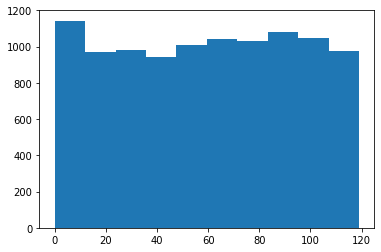

In [14]:
# Histogram of the breeds of the training set images
plt.hist(image_breed_id)
plt.show()

There is a uniform distribution of the breeds. This is good as the neural network won't have too many or too little training data for any given breed.

In [15]:
# Checking the size of all the images
image_shape = []
for image in os.listdir(train_folder):
    images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
    image_shape.append(images.shape)

In [16]:
# Creating the x and y values for the plot
x_image_shape = [image_shape[row][1] for row in range(len(image_shape))]
y_image_shape = [image_shape[row][0] for row in range(len(image_shape))]

In [63]:
# Creating list of the number of pixels per image
num_pixels_list = [x_image_shape[row] * y_image_shape[row]  for row in range(len(x_image_shape))]
num_pixels = np.array(num_pixels_list)

In [67]:
num_pixels.mean()

184176.3459205635

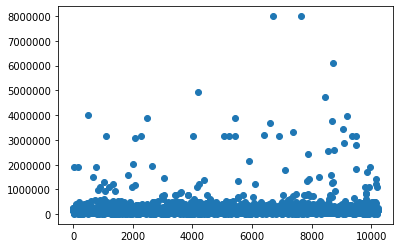

In [82]:
# Scatter plot of the number of pixels of the training set images
plt.scatter(range(len(num_pixels)), num_pixels)
plt.show()

The scatter plot shows that most of the images have less than 1 million pixels with the average being 184,176.35 pixels. There are many outliers, however. 

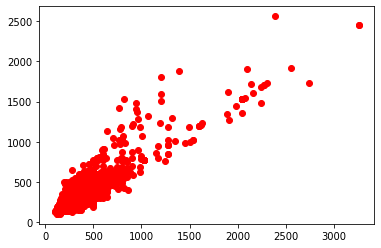

In [17]:
# Plotting the sizes of the images
plt.plot(x_image_shape, y_image_shape, 'ro')
plt.show()

The plot above shows the image size in terms of the images length and width. 

In [22]:
# Find the maximum x-value/y-value
print(max(x_image_shape))
print(max(y_image_shape))

3264
2562


In [23]:
# Find the minimum x-value/y-value
print(min(x_image_shape))
print(min(y_image_shape))

97
102


In [101]:
# Find the index of the image with the largest x-value, 3,264
for row in range(len(image_shape)):
    if image_shape[row][1] == 3264:
        print(row, image_shape[row])

6693 (2448, 3264)
7645 (2448, 3264)


In [24]:
# Find the index of the image with the smallest x-value, 97
for row in range(len(image_shape)):
    if image_shape[row][1] == 97:
        print(row, image_shape[row])

4214 (134, 97)


image shape: (2448, 3264)
number of pixels: 7990272


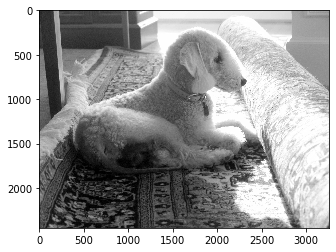

In [45]:
# Taking a look at image #6693 at its normal size
for index, image in enumerate(os.listdir(train_folder)):
    if index == 6693:
        images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
    else:
        pass
    
print('image shape:', images.shape)
print('number of pixels:', images.size)
plt.imshow(images, cmap='gray')
plt.show()

(200, 200)


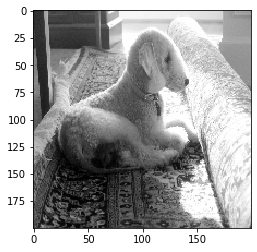

In [44]:
# Checking to see if image #6693 looks good when resized to 200x200
image_size = 200
for index, image in enumerate(os.listdir(train_folder)):
    if index == 6693:
        images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
        images = cv2.resize(images, (image_size, image_size))
    else:
        pass
    
print(images.shape)
plt.imshow(images, cmap='gray')
plt.show()

image shape: (134, 97)
number of pixels: 12998


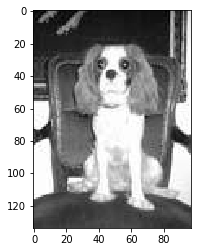

In [46]:
# Taking a look at image #4214 at its normal size
for index, image in enumerate(os.listdir(train_folder)):
    if index == 4214:
        images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
    else:
        pass
    
print('image shape:', images.shape)
print('number of pixels:', images.size)
plt.imshow(images, cmap='gray')
plt.show()

(200, 200)


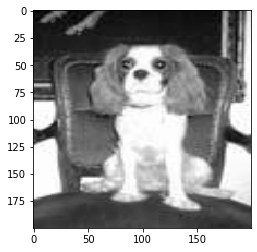

In [47]:
# Checking to see if image #4214 looks good when resized to 200x200
image_size = 200
for index, image in enumerate(os.listdir(train_folder)):
    if index == 4214:
        images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
        images = cv2.resize(images, (image_size, image_size))
    else:
        pass
    
print(images.shape)
plt.imshow(images, cmap='gray')
plt.show()

Image #6693 (one of the largest images) and image #4214 (one of the smallest images)  look good at 200x200 so, all images will be resized to that ratio.

## Hypothesis test:

We want to determine whether the difference between the average number of pixels per breed is statistically significant. This will be done by comparing the p-value to the significance level to the null hypothesis. The test used for this analysis is a One-Way ANOVA.

Null-Hypothesis: There is no difference between the means of pixels of each breed 

Alt-Hypothesis: The means of some of the breeds are different

alpha= .05

In [158]:
# Create a list and then a Dataframe of each image's breed and number of pixels
breed_imagesize = [(breed_of_image[row], num_pixels_list[row]) for row in range(len(breed_of_image))]
breed_imagesize_df = pd.DataFrame(breed_imagesize, columns = ['breed', 'pixels'])

In [161]:
# The average number of pixels per breed (first 10)
breed_imagesize_df.groupby(by='breed').mean().head(10)

,pixels
breed,
affenpinscher,126256.812500
afghan_hound,187398.060345
african_hunting_dog,174261.453488
airedale,177532.841121
american_staffordshire_terrier,165741.337838
appenzeller,175589.282051
australian_terrier,153140.058824
basenji,214494.936364
basset,219222.048780


In [153]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [160]:
# One-Way ANOVA Test
lm = ols('pixels ~ breed',data=breed_imagesize_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

               df        sum_sq       mean_sq         F        PR(>F)
breed       119.0  1.187827e+13  9.981743e+10  1.901349  1.525382e-08
Residual  10102.0  5.303371e+14  5.249822e+10       NaN           NaN


The p-value on our F-statistic is much smaller than the significance level of .05. Therefore, the null hypothesis is rejected. It is concluded that some of the differences between the pixel means of the breeds are statistically significant. 

This, however, won't affect the neural network as the images will be resized to 40,000 pixels for each image. Our comparison of the images before and after resizing demonstrate that image integrity is maintained when resized. 

## 2. Neural Network 

### Creating the training set 

In [89]:
# Build function to create the training data set
train_data = []
image_size = 200

def training_data_set():
    for index, image in enumerate(os.listdir(train_folder)):
        images = cv2.imread(os.path.join(train_folder, image), cv2.IMREAD_GRAYSCALE)
        images = cv2.resize(images, (image_size, image_size))
        train_data.append([images,image_breed_id[index]])
    return train_data

In [90]:
train = training_data_set()

In [162]:
len(train)

10222

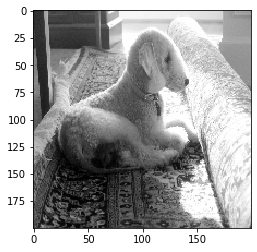

In [94]:
# Testing to make sure the images loaded correctly
plt.imshow(train[6693][0], cmap='gray')
plt.show()

### Separating the training set into the feature and label

In [189]:
feature = []
label = []

for train_image, train_breed_image in train:
    feature.append(train_image)
    label.append(train_breed_image)

# 'feature' must be a numpy array, not list
# the 1 at the end of the reshape denotes grayscale
feature = np.array(feature).reshape(-1,image_size,image_size,1)
label = np.array(label)

In [171]:
# Normalize the feature by dividing by 255 (pixel data)
feature_norm = feature/255.0

In [217]:
len(label)

10222

In [242]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [245]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = feature_norm.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

adam = optimizers.Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(feature_norm, label, batch_size=32, epochs=3, validation_split=0.2)

Train on 8177 samples, validate on 2045 samples
Epoch 1/3
8177/8177 [==============================] - 1003s 123ms/sample - loss: -7168565675.1460 - accuracy: 0.0115 - val_loss: -39433385366.0949 - val_accuracy: 0.0108
Epoch 2/3
8177/8177 [==============================] - 973s 119ms/sample - loss: -299028933017.4998 - accuracy: 0.0115 - val_loss: -795622144237.3477 - val_accuracy: 0.0108
Epoch 3/3
8177/8177 [==============================] - 973s 119ms/sample - loss: -2209686372558.3779 - accuracy: 0.0115 - val_loss: -4182913592080.1489 - val_accuracy: 0.0108


In [224]:
model = Sequential()

model.add(Conv2D(16, 2, activation='relu', input_shape=feature_norm.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(133, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(feature_norm, label, batch_size=20, epochs=3, validation_split=0.2)

ValueError: A target array with shape (10222, 1) was passed for an output of shape (None, 133) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.